# Day 7 : Data Loading and Manipulation and Visulatiozation (New Data)

### You can use the following liberaries for your assignment:
> Numpy, Pandas, Matplotlib, Seaborn, LASIO, Welly

## Kindly load the las file of well1513.csv file from the data folder
## Perform the below Tasks:

>1. Investigate the component of the data file (number of columns , numbers of observations, Null values, normal statistics) 
2. Plot the null values as horizontal bars
3. Create a copy of the data frame and drop the NAN values
3. Check out the correlation between the features (columns)
4. Calculate the VP log from the DT sonic curve
5. Plot VP vs NPHI using regplot.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import lasio
import welly

from IPython.display import display

In [2]:
df = pd.read_csv("C:/Users/HP/Documents/GitHub/GeoML-2.0/10DaysChallenge/well1513.csv", delimiter=',')
display(df)

,Unnamed: 0,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,18265,15/9-13,3271.416,437593.40625,6470983.0,-3245.549316,ZECHSTEIN GP.,Smith Bank Fm.,8.541623,NaN,...,1.524012,NaN,NaN,-0.005047,0.155774,NaN,NaN,NaN,74000,3.0
18266,18266,15/9-13,3271.568,437593.37500,6470983.0,-3245.700928,ZECHSTEIN GP.,Smith Bank Fm.,8.557213,NaN,...,2.056166,NaN,NaN,0.002087,0.155774,NaN,NaN,NaN,74000,3.0
18267,18267,15/9-13,3271.720,437593.37500,6470983.0,-3245.852539,ZECHSTEIN GP.,Smith Bank Fm.,8.577917,NaN,...,2.909438,NaN,NaN,0.007469,0.155774,NaN,NaN,NaN,74000,3.0
18268,18268,15/9-13,3271.872,437593.37500,6470983.0,-3246.004395,ZECHSTEIN GP.,Smith Bank Fm.,8.478219,NaN,...,2.909438,NaN,NaN,0.010048,0.155774,NaN,NaN,NaN,74000,3.0


In [3]:
#1) Data Investigation

display('Col, Rows',df.shape)
display('info',df.info())
display('Null values',df.isna().sum())
display('Null values%',df.isna().sum()/ df.shape[0] *100)
display('normal statistics',df.describe())

'Col, Rows'

(18270, 30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         18270 non-null  int64  
 1   WELL                               18270 non-null  object 
 2   DEPTH_MD                           18270 non-null  float64
 3   X_LOC                              18270 non-null  float64
 4   Y_LOC                              18270 non-null  float64
 5   Z_LOC                              18270 non-null  float64
 6   GROUP                              18270 non-null  object 
 7   FORMATION                          15806 non-null  object 
 8   CALI                               18270 non-null  float64
 9   RSHA                               1623 non-null   float64
 10  RMED                               18270 non-null  float64
 11  RDEP                               18270 non-null  flo

'info'

None

'Null values'

Unnamed: 0                               0
WELL                                     0
DEPTH_MD                                 0
X_LOC                                    0
Y_LOC                                    0
Z_LOC                                    0
GROUP                                    0
FORMATION                             2464
CALI                                     0
RSHA                                 16647
RMED                                     0
RDEP                                     0
RHOB                                     0
GR                                       0
SGR                                  18270
NPHI                                  4238
PEF                                   1830
DTC                                     81
SP                                       0
BS                                   18270
ROP                                    109
DTS                                  18270
DCAL                                 18270
DRHO       

'Null values%'

Unnamed: 0                             0.000000
WELL                                   0.000000
DEPTH_MD                               0.000000
X_LOC                                  0.000000
Y_LOC                                  0.000000
Z_LOC                                  0.000000
GROUP                                  0.000000
FORMATION                             13.486590
CALI                                   0.000000
RSHA                                  91.116585
RMED                                   0.000000
RDEP                                   0.000000
RHOB                                   0.000000
GR                                     0.000000
SGR                                  100.000000
NPHI                                  23.196497
PEF                                   10.016420
DTC                                    0.443350
SP                                     0.000000
BS                                   100.000000
ROP                                    0

'normal statistics'

,Unnamed: 0,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,18270.000000,18270.000000,18270.000000,1.827000e+04,18270.000000,18270.000000,1623.000000,18270.000000,18270.000000,18270.000000,...,18161.000000,0.0,0.0,18270.000000,17464.000000,0.0,0.0,1627.000000,18270.000000,18270.000000
mean,9134.500000,1883.228478,437627.322429,6.470979e+06,-1857.985240,14.789688,2.901504,1.835372,1.832040,2.110451,...,27.115614,NaN,NaN,0.012675,0.139777,NaN,NaN,5.748493,60476.696223,1.039080
std,5274.239045,801.941195,14.359784,3.508944e+00,801.742890,4.377047,3.474120,2.891524,2.197939,0.297725,...,30.452190,NaN,NaN,0.047393,0.009454,NaN,NaN,71.588789,13972.748152,0.276835
min,0.000000,494.528000,437593.343750,6.470972e+06,-3246.156250,8.186605,0.175400,0.374989,0.352202,1.404576,...,0.138586,NaN,NaN,-0.679026,0.129413,NaN,NaN,0.171424,30000.000000,1.000000
25%,4567.250000,1188.750000,437614.812500,6.470976e+06,-2552.392883,12.125232,0.934778,0.782044,0.799976,1.963399,...,4.727499,NaN,NaN,-0.007219,0.133007,NaN,NaN,0.934500,65000.000000,1.000000
50%,9134.500000,1882.972000,437631.187500,6.470978e+06,-1857.799133,13.913155,1.473143,1.211789,1.293638,2.055079,...,30.297560,NaN,NaN,0.001565,0.136602,NaN,NaN,1.455721,65000.000000,1.000000
75%,13701.750000,2577.802000,437640.781250,6.470982e+06,-1163.699371,18.309367,3.352066,2.067438,2.085021,2.381963,...,39.995598,NaN,NaN,0.020022,0.144990,NaN,NaN,3.464941,65000.000000,1.000000
max,18269.000000,3272.024000,437642.812500,6.470984e+06,-469.501831,23.329569,54.536583,142.606338,49.221905,2.927888,...,1083.425415,NaN,NaN,0.210927,0.156973,NaN,NaN,2000.000000,99000.000000,3.000000


<AxesSubplot:title={'center':'Missing Values Comparison'}>

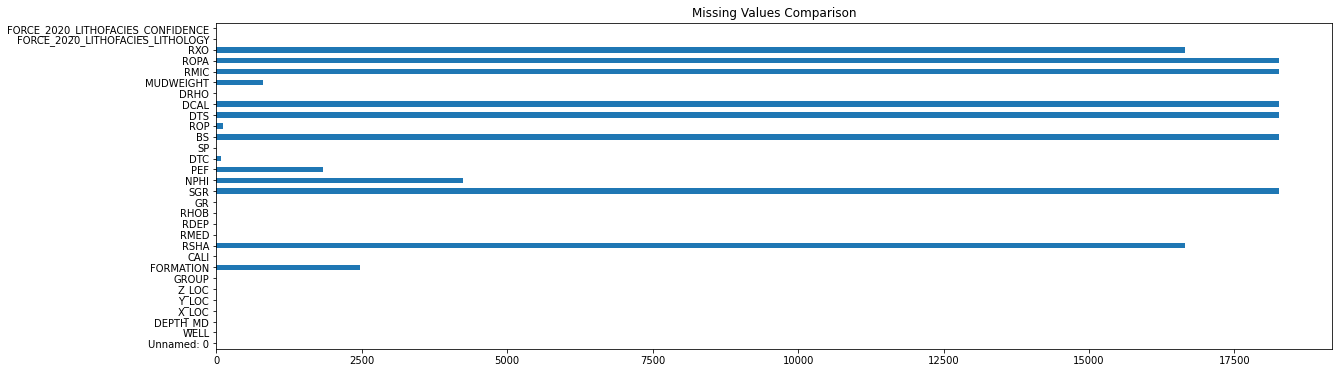

In [4]:
#2. Plot the null values as horizontal bars
df.isnull().sum().plot(kind = 'barh', title = 'Missing Values Comparison', figsize=(20,6))

In [5]:
#3. Create a copy of the data frame and drop the NAN values
df_dropna=df.copy()
print('original df =',df_dropna.shape)
df_dropna.dropna(inplace=True)
print('after removing nans =',df_dropna.shape)
print('=' *100)
print('This dataset has {0} rows and {1} columns'.format(df_dropna.shape[0],df_dropna.shape[1]))

original df = (18270, 30)
after removing nans = (0, 30)
This dataset has 0 rows and 30 columns


In [7]:
#4. Check out the correlation between the features (columns)
df_dropna.corr()

,Unnamed: 0,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
Unnamed: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEPTH_MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_LOC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y_LOC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z_LOC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CALI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RSHA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RMED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RDEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RHOB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#4. Check out the correlation between the features (columns)
#Original logs
df.corr()

,Unnamed: 0,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
Unnamed: 0,1.000000,1.000000,-0.964739,0.981123,-1.000000,-0.752423,-0.149427,0.293392,0.312552,0.745903,...,-0.479518,NaN,NaN,0.274373,0.896612,NaN,NaN,0.044135,0.211088,0.082678
DEPTH_MD,1.000000,1.000000,-0.964766,0.981117,-1.000000,-0.752383,-0.149427,0.293424,0.312599,0.745932,...,-0.479552,NaN,NaN,0.274382,0.896603,NaN,NaN,0.044135,0.211084,0.082714
X_LOC,-0.964739,-0.964766,1.000000,-0.911835,0.964746,0.692273,0.120490,-0.332438,-0.363355,-0.767512,...,0.500740,NaN,NaN,-0.284274,-0.902337,NaN,NaN,-0.052518,-0.191358,-0.087109
Y_LOC,0.981123,0.981117,-0.911835,1.000000,-0.981127,-0.735570,-0.215365,0.252337,0.266458,0.703638,...,-0.452180,NaN,NaN,0.249901,0.857760,NaN,NaN,0.036340,0.198507,0.090631
Z_LOC,-1.000000,-1.000000,0.964746,-0.981127,1.000000,0.752395,0.149433,-0.293408,-0.312581,-0.745921,...,0.479543,NaN,NaN,-0.274376,-0.896597,NaN,NaN,-0.044132,-0.211088,-0.082707
CALI,-0.752423,-0.752383,0.692273,-0.735570,0.752395,1.000000,-0.094091,-0.294729,-0.324859,-0.753039,...,0.418911,NaN,NaN,-0.164504,-0.771949,NaN,NaN,-0.033088,-0.475486,-0.047827
RSHA,-0.149427,-0.149427,0.120490,-0.215365,0.149433,-0.094091,1.000000,0.557210,0.344543,0.529704,...,-0.279281,NaN,NaN,-0.399183,0.072540,NaN,NaN,0.933735,0.228364,NaN
RMED,0.293392,0.293424,-0.332438,0.252337,-0.293408,-0.294729,0.557210,1.000000,0.805233,0.412324,...,-0.226581,NaN,NaN,-0.033947,0.321494,NaN,NaN,0.008287,0.128792,0.076500
RDEP,0.312552,0.312599,-0.363355,0.266458,-0.312581,-0.324859,0.344543,0.805233,1.000000,0.448933,...,-0.267562,NaN,NaN,-0.040219,0.351243,NaN,NaN,-0.000115,0.079215,0.043260
RHOB,0.745903,0.745932,-0.767512,0.703638,-0.745921,-0.753039,0.529704,0.412324,0.448933,1.000000,...,-0.433978,NaN,NaN,0.158254,0.755144,NaN,NaN,0.051548,0.509061,0.037008


In [10]:
#5. Calculate the VP log from the DT sonic curve (Assuming units: microsec/m)
#Method A
df['Vp_sonic_a'] = 10**6/df['DTC']
df.keys()

Index(['Unnamed: 0', 'WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP',
       'FORMATION', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR',
       'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO',
       'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE', 'Vp_sonic_a'],
      dtype='object')

In [11]:
#5. Calculate the VP log from the DT sonic curve
#Method B
df['Vp_sonic_b'] = df['DTC']*30465
df.keys()

Index(['Unnamed: 0', 'WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP',
       'FORMATION', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR',
       'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO',
       'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE', 'Vp_sonic_a', 'Vp_sonic_b'],
      dtype='object')

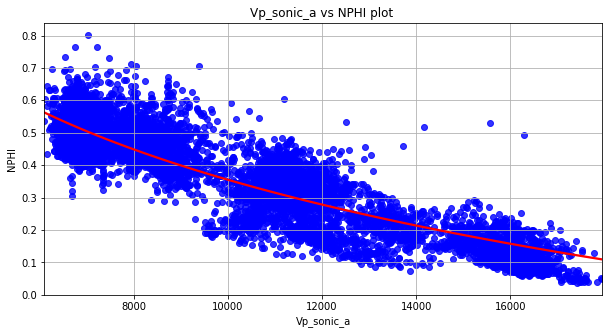

In [12]:
#5. Plot VP vs NPHI using regplot.

plt.figure(figsize=(10,5))
sb.regplot(data = df, x = 'Vp_sonic_a', y = 'NPHI',color='b', fit_reg = True, line_kws={'color':'red'}, marker='o', logx=True)
plt.title('Vp_sonic_a vs NPHI plot ')
plt.xlabel('Vp_sonic_a')
plt.ylabel('NPHI')
plt.grid();

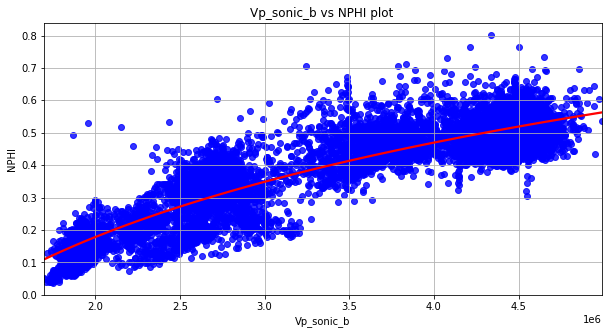

In [13]:
plt.figure(figsize=(10,5))
sb.regplot(data = df, x = 'Vp_sonic_b', y = 'NPHI',color='b', fit_reg = True, line_kws={'color':'red'}, marker='o', logx=True)
plt.title('Vp_sonic_b vs NPHI plot ')
plt.xlabel('Vp_sonic_b')
plt.ylabel('NPHI')
plt.grid();